Article - https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

GitHub -  https://github.com/yalinyener/TwitterSentimentAnalysis

Step 1: Install and Import Libraries

In [1]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/neelesh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/neelesh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Step 2: Authentication for Twitter API

In [3]:
# Authentication
consumerKey = "enter API key"
consumerSecret = "enter API secret"
accessToken = "enter access token"
accessTokenSecret = "enter access secret"
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
api.rate_limit_status()

Step 3: Getting Tweets With Keyword or Hashtag

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)


keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

print(f"hashtag = {keyword}")
print(f"count = {noOfTweet}")

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

hashtag = basf
count = 2000


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2000
positive number:  327
negative number:  481
neutral number:  1192


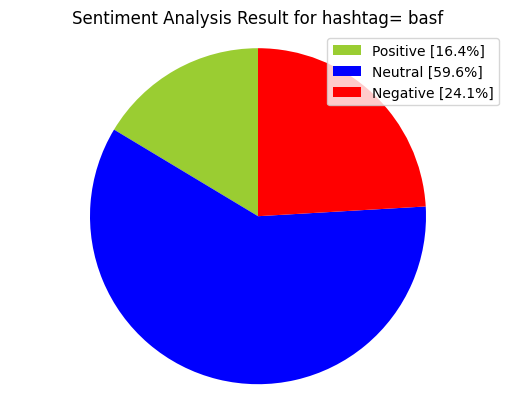

In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for hashtag= "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list

,0
0,@BASF_IT @LHTechnik @Lufthansa_Cargo No..
1,The highest #dividend #yield #dividendenrendit...
2,"Account Manager(ENP) - at BASF \n\nTo apply, c..."
3,@rlpNews @Bundeskanzler @RegSprecher @clemensh...
4,NewswireToday / ExxonMobil Awards BASF Durasor...
...,...
1995,"RT @AlperUcok: Linde, Siemens, BASF, Bosch gib..."
1996,"RT @AlperUcok: Linde, Siemens, BASF, Bosch gib..."
1997,@ProjectLincoln @Airbnb @BASF @CBS @Cisco @eBa...
1998,RT @andromeda_IX: @Klaasvaak60 @CryptoBusy @Un...


Step 4: Cleaning Tweets to Analyse Sentiment

In [ ]:
tweet_list.drop_duplicates(inplace = True)
tweet_list

,0
0,@BASF_IT @LHTechnik @Lufthansa_Cargo No..
1,The highest #dividend #yield #dividendenrendit...
2,"Account Manager(ENP) - at BASF \n\nTo apply, c..."
3,@rlpNews @Bundeskanzler @RegSprecher @clemensh...
4,NewswireToday / ExxonMobil Awards BASF Durasor...
...,...
1992,@JavierBlas Germany made it through this winte...
1993,@thesiriusreport Never. BASF has moved its mai...
1994,The price of #Polybutylene_Terephthalate has w...
1997,@ProjectLincoln @Airbnb @BASF @CBS @Cisco @eBa...


In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@\w+)|([^A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@BASF_IT @LHTechnik @Lufthansa_Cargo No..,no
1,The highest #dividend #yield #dividendenrendit...,the highest dividend yield dividendenrendit...
2,"Account Manager(ENP) - at BASF \n\nTo apply, c...",account manager enp at basf to apply cli...
3,@rlpNews @Bundeskanzler @RegSprecher @clemensh...,
4,NewswireToday / ExxonMobil Awards BASF Durasor...,newswiretoday exxonmobil awards basf durasor...
5,@MarkusL32078761 @c_lindner BASF und Bayer wan...,basf und bayer wandern ab in die usa w...
6,RT @SariArhoHavren: Germany’s Bet on China Is ...,germany s bet on china is a crisis in the mak...
7,"Les #Sunions, les oignons qui ne font pas pleu...",les sunions les oignons qui ne font pas pleu...
8,@forsalpl Na pewno tak jest. Za nami grupa VAG...,na pewno tak jest za nami grupa vag bmw d...
9,🗞️What's been in the news this week?🗞️\nClick ...,what s been in the news this week click b...


Step 5: Sentiment Analyse

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

/var/folders/wx/1_76tj0s15gc4yxmndvw4l_00000gn/T/ipykernel_1061/2941287026.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in tw_list['text'].iteritems():


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@BASF_IT @LHTechnik @Lufthansa_Cargo No..,no,0.00,0.000,negative,1.000,0.000,0.000,-0.2960
1,The highest #dividend #yield #dividendenrendit...,the highest dividend yield dividendenrendit...,0.00,0.000,neutral,0.000,1.000,0.000,0.0000
2,"Account Manager(ENP) - at BASF \n\nTo apply, c...",account manager enp at basf to apply cli...,0.00,0.000,neutral,0.000,1.000,0.000,0.0000
3,@rlpNews @Bundeskanzler @RegSprecher @clemensh...,,0.00,0.000,neutral,0.000,0.000,0.000,0.0000
4,NewswireToday / ExxonMobil Awards BASF Durasor...,newswiretoday exxonmobil awards basf durasor...,0.00,0.000,positive,0.000,0.824,0.176,0.4588
5,@MarkusL32078761 @c_lindner BASF und Bayer wan...,basf und bayer wandern ab in die usa w...,0.00,0.000,negative,0.218,0.782,0.000,-0.5994
6,RT @SariArhoHavren: Germany’s Bet on China Is ...,germany s bet on china is a crisis in the mak...,0.65,0.625,negative,0.212,0.648,0.140,-0.2732
7,"Les #Sunions, les oignons qui ne font pas pleu...",les sunions les oignons qui ne font pas pleu...,0.00,0.000,positive,0.000,0.874,0.126,0.3818
8,@forsalpl Na pewno tak jest. Za nami grupa VAG...,na pewno tak jest za nami grupa vag bmw d...,0.00,0.000,neutral,0.000,1.000,0.000,0.0000
9,🗞️What's been in the news this week?🗞️\nClick ...,what s been in the news this week click b...,0.00,1.000,neutral,0.000,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,837,61.73
positive,264,19.47
negative,255,18.81


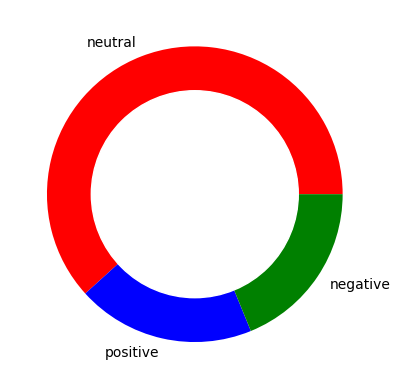

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['red','blue','green'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                   mask = mask,
                   max_words=3000,
                   stopwords=stopwords,
                   repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))


Word Cloud Saved Successfully


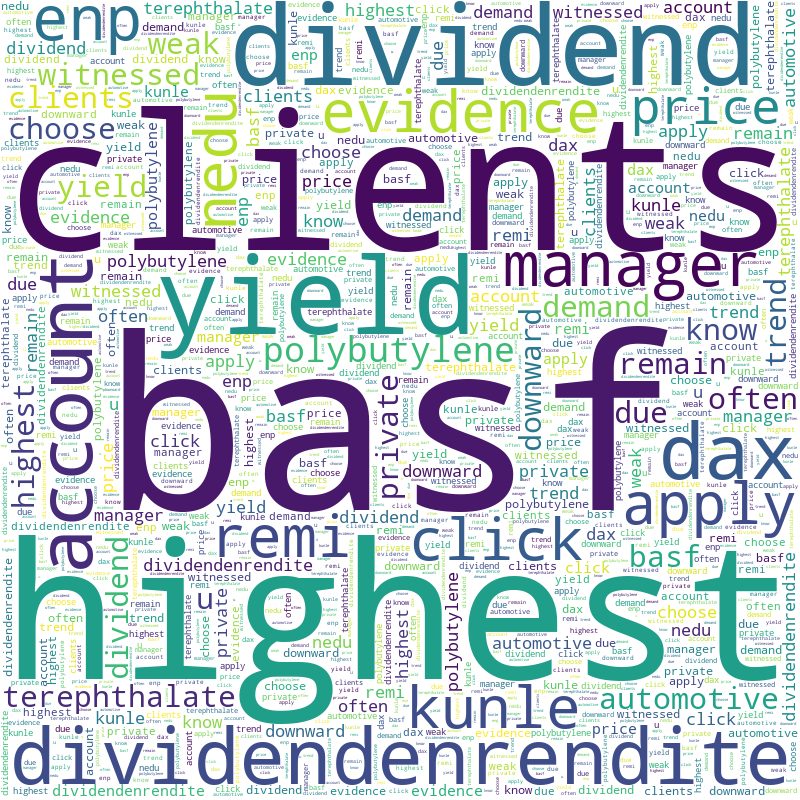

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


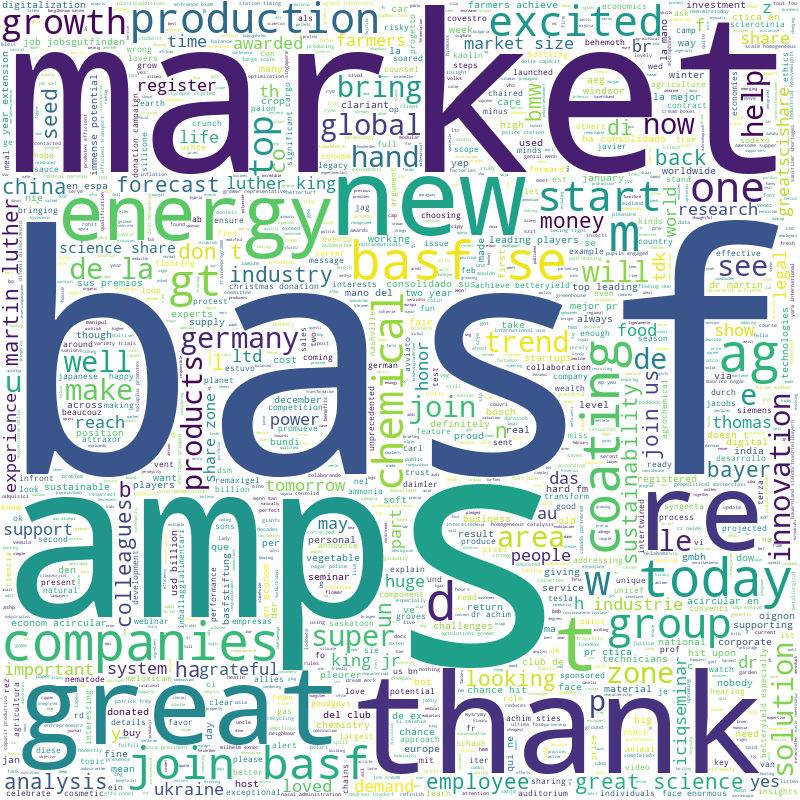

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


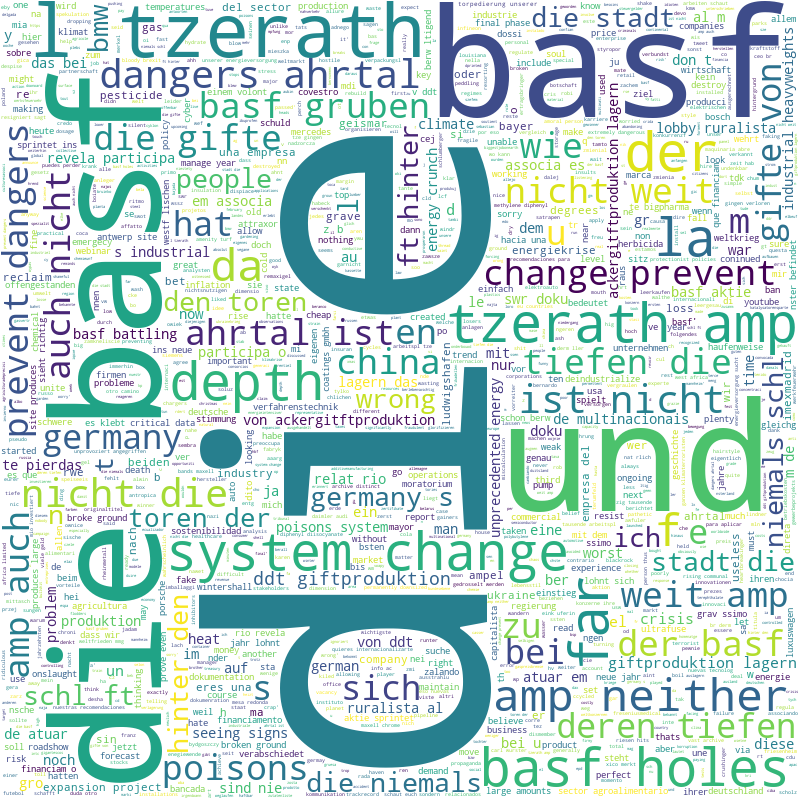

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

In [ ]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,99.81
neutral,85.89
positive,97.86


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,16.50
neutral,10.67
positive,15.41


In [ ]:
#Removing Punctuation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

#Applying tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

#Applying Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

# Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,@BASF_IT @LHTechnik @Lufthansa_Cargo No..,no,0.0,0.0,negative,1.0,0.000,0.000,-0.2960,10,1,no,"[, no, ]","[, ]","[, ]"
1,The highest #dividend #yield #dividendenrendit...,the highest dividend yield dividendenrendit...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,81,10,the highest dividend yield dividendenrendit...,"[the, highest, dividend, yield, dividendenrend...","[highest, dividend, yield, dividendenrendite, ...","[highest, dividend, yield, dividendenrendit, d..."
2,"Account Manager(ENP) - at BASF \n\nTo apply, c...",account manager enp at basf to apply cli...,0.0,0.0,neutral,0.0,1.000,0.000,0.0000,94,15,account manager enp at basf to apply cli...,"[account, manager, enp, at, basf, to, apply, c...","[account, manager, enp, basf, apply, click, ev...","[account, manag, enp, basf, appli, click, evid..."
3,@rlpNews @Bundeskanzler @RegSprecher @clemensh...,,0.0,0.0,neutral,0.0,0.000,0.000,0.0000,18,0,,"[, ]","[, ]","[, ]"
4,NewswireToday / ExxonMobil Awards BASF Durasor...,newswiretoday exxonmobil awards basf durasor...,0.0,0.0,positive,0.0,0.824,0.176,0.4588,118,15,newswiretoday exxonmobil awards basf durasor...,"[newswiretoday, exxonmobil, awards, basf, dura...","[newswiretoday, exxonmobil, awards, basf, dura...","[newswiretoday, exxonmobil, award, basf, duras..."


In [ ]:
#Applying Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text)
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.vocabulary_)
count_vect_df.head()


1356 Number of reviews has 4660 words


,,highest,dividend,yield,dividendenrendit,dax,basf,account,manag,enp,...,nemd,inovasyonlar,geli,tirmi,olsa,japon,line,polybutylen,terephthal,privat
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
eltern,613
limit,231
properti,153
descubr,146
oldu,96
hat,95
countri,90
edunvalvontaa,85
ep,60
intellectu,59


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams


[('die basf', 26),
 ('achim sties', 26),
 ('basf se', 20),
 ('amp basf', 20),
 ('tzerath amp', 19),
 ('der basf', 18),
 ('ahrtal far', 18),
 ('far tzerath', 18),
 ('basf holes', 18),
 ('holes depth', 17),
 ('depth poisons', 17),
 ('plastic additives', 17),
 ('nicht die', 16),
 ('dangers ahrtal', 16),
 ('ist nicht', 16),
 ('dr achim', 15),
 ('change prevent', 15),
 ('prevent dangers', 15),
 ('ahrtal ist', 15),
 ('nicht weit', 15)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('ahrtal far tzerath', 18),
 ('far tzerath amp', 18),
 ('tzerath amp basf', 17),
 ('amp basf holes', 17),
 ('basf holes depth', 17),
 ('holes depth poisons', 17),
 ('dangers ahrtal far', 16),
 ('dr achim sties', 15),
 ('change prevent dangers', 15),
 ('prevent dangers ahrtal', 15),
 ('ahrtal ist nicht', 15),
 ('ist nicht weit', 15),
 ('nicht weit amp', 15),
 ('die basf gruben', 15),
 ('nicht die basf', 14),
 ('tiefen die gifte', 14),
 ('senior vice president', 12),
 ('weit amp auch', 12),
 ('amp auch nicht', 12),
 ('auch nicht die', 12)]